<a href="https://colab.research.google.com/github/nangira/Independent-Project/blob/main/Financial_Inclusion_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINANCIAL INCLUSION**

## **Introduction**

According to World Bank, **Financial inclusion** means that individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way. It is considered as a key enabler to reduce extreme poverty and boost shared prosperity. It is also considered as an enabler for 7 of the 17 Sustainable Development Goals.

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, being able to have access to a transaction account is a first step toward broader financial inclusion since a transaction account serves as a gateway to other financial services, which is why ensuring that people worldwide can have access to a transaction account is key.


Main Question: Does cell phone access have a positive correlation with respondents having a bank account?


Research Questions:


1.   Which country has most cell phone users with respect to their sample size
2.   Which area has more respondents with bank accounts, rural or urban?
3.   What is the distribution of level of education depending on gender?
4. What is the distribution of bank ownership based on level of education?
5.   Which types of jobs do the respondents do based on their bank ownership?






In [2]:
# First, we shall load the required libraries for this exercise.
import numpy as np
import pandas as pd
import statistics
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset

dataset = pd.read_csv('Financial Dataset.csv')

#viewing the first five entries in our dataset
dataset.head()

#viewing the last five entries in our dataset
dataset.tail()

# Renaming one of the columns
dataset.columns = dataset.columns.str.replace('The relathip with head', 'The relationship with head')

# Changing uniqueid entries to have just the number
dataset['uniqueid'] = dataset['uniqueid'].str.replace(r'\D', '')
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
# Checking how many entries we have in total
dataset.shape

# Checking the data types of the columns in our dataset
dataset.dtypes

# Checking for missing data
print(dataset.isna().sum())

# Removing missing values from our dataset
data = dataset.dropna()

# Confirming there are no more missing values in our dataset
print(data.isna().sum())

# Seeing how many entries we now have in the dataset
data.shape


country                       14
year                           0
uniqueid                       0
Has a Bank account            36
Type of Location              15
Cell Phone Access             11
household_size                28
Respondent Age                34
gender_of_respondent          34
The relationship with head     4
marital_status                32
Level of Educuation           29
Type of Job                   30
dtype: int64
country                       0
year                          0
uniqueid                      0
Has a Bank account            0
Type of Location              0
Cell Phone Access             0
household_size                0
Respondent Age                0
gender_of_respondent          0
The relationship with head    0
marital_status                0
Level of Educuation           0
Type of Job                   0
dtype: int64


(23343, 13)

The dataset had 23,524 entries with 13 columns. The column data types are a mix of numerical and categorical values. 12 out of the 13 columns have missing data.

After dropping the missing data, our dataset now has 23,343 rows and 13 columns.


## **Data Validation**

Here, we shall use data from *Financial Sector Deepening Kenya* (FSD Kenya) which is an independent trust dedicated to the achievement of a financial system that delivers value for a green and inclusive digital economy while improving financial health and capability for women and micro and small enterprises (MSEs).

We shall also use reports from Finscope Rwanda, Tanzania and Uganda to validate the data.

The data is from their annual reports for the countries being considered in this study i.e. The 2018 annual report for Kenya and Uganda, the 2017 and 2016 reports for Tanzania and Rwanda, respectively.

We shall validate the data by checking the following:
Correct data types,
No invalid values,
Data is not out of range,
It's complete, such as making sure all required form fields have data

***Variable Definitions:***

**Country** - Country interviewee is in.

**Year** - Year survey was done in.

**uniqueid** - Unique identifier for each interviewee

**location_type** - Type of location: Rural, Urban

**cellphone_access** - If interviewee has access to a cellphone: Yes, No

**household_size** - Number of people living in one house

**age_of_respondent** - The age of the interviewee

**gender_of_respondent** - Gender of interviewee: Male, Female

**relationship_with_head** - The interviewee's relationship with the head of the house i.e Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

**marital_status** - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know

**education_level** - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA

**job_type** - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer





## **Exploratory Data Analysis**

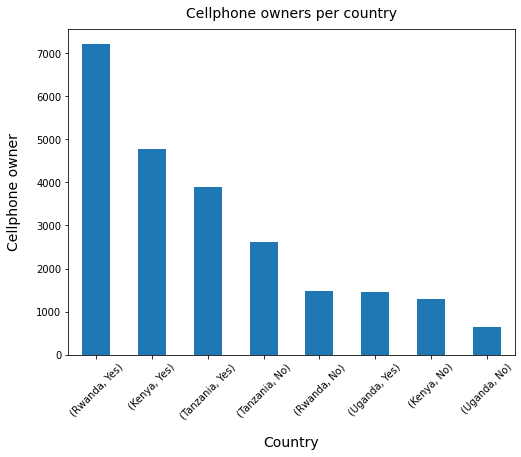

In [6]:
# Using value_counts() so that the chart plots the number of respondents per category


data[['country', 'Cell Phone Access']].value_counts().plot(kind='bar', figsize=(8, 6))

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Cellphone owners per country", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Cellphone owner", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Country", fontsize=14, labelpad=15)

# Displaying our chart

plt.show()

### **Univariate Analysis**

**Numeric Columns**

In [7]:
# The survey was taking record of data from the following years
data['year'].unique()

# Creating a list of the other two numeric variables; household size and respondent age:
numeric_variables = data[['household_size', 'Respondent Age']]

# Checking the mode for each numeric variable
statistics.mode(data['household_size'])
statistics.mode(data['Respondent Age'])

# Viewing the count, mean, standard deviation,variance, minimum and maximum values and the skewness and kurtosis measures of the numeric variables
print(numeric_variables.apply(["count","mean","std","var" ,"median", "max","min", "skew", "kurt"]))

# range of values (maximum - minimum)value
size_maximum = max(data['household_size'])
size_minimum = min(data['household_size']) 

size_range = size_maximum - size_minimum

age_maximum = max(data['Respondent Age'])
age_minimum = min(data['Respondent Age']) 

age_range = age_maximum - age_minimum

print("The household size variable range for the values is", size_range, "while that of the Respondent Age variable is", age_range)

        household_size  Respondent Age
count     23343.000000    23343.000000
mean          3.688643       38.805509
std           2.281184       16.519803
var           5.203798      272.903908
median        3.000000       35.000000
max          21.000000      100.000000
min           0.000000       16.000000
skew          0.974109        0.840662
kurt          1.153869        0.098447
The household size variable range for the values is 21.0 while that of the Respondent Age variable is 84.0


The output on the numeric variables shows us the count, mean, standard deviation, variance, median, maximum and minimum values, skewness and kurtosis measures. Below is an explanation for each measure to help interpret the output for each variable.

The **mean** represents the average of the data points recorded in each variable and is attained by dividing the sum of all values in a variable by the count, excluding missing values.

**Standard deviation** and **variance** are measures of dispersion. The closer the values are to zero, the more clustered the data points are around the mean else they are spread out. The higher the value, the more spread out they are.

The **median** represents the value in the middle once the data is arranged in ascending order.

The **mode** represents the value that occurred most times.

The **maximum** and **minimum** values are the highest and lowest recorded values in a variable

**Skewness** is a statistical measure of asymmetric distribution of data. A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values. A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** helps determine if the distribution is heavy-tailed compared to a normal distribution. The kurtosis of a normal distribution is 3. If a given distribution has a kurtosis greater than 3 then it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution. If it's less than 3, it means it tends to produce fewer and less extreme outliers than the normal distribution.

**Range** is an index of variability. When the range is more the group is more variable. The smaller the range the more homogeneous is the group.

The data was collected in the years 2016,2017,2018. 2029,2056 and 2039 were anomalies.

In [8]:
# Checking the 0.25,0.50 and 0.75 quantiles

quantiles = numeric_variables.quantile([.25,.5,.75])
quantiles

# Calculating the interquantile range

interquantile_range = numeric_variables.quantile(.75) - numeric_variables.quantile(.25)
interquantile_range


household_size     3.0
Respondent Age    23.0
dtype: float64

25% of the entries under household size fall under 2 while for the Respondent's Age, it's 26 years old.

50% of the household size data points fall under 3, while for Respondent Age, they fall under 35 years old.

75% of the household size entries fall under 5 while for Respondent's age, it's 49 years old.

The interquantile range for household size is 3, meaning the values are clustered around the mean while that of Respondent Age is 23 meaning the data is more spread out.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


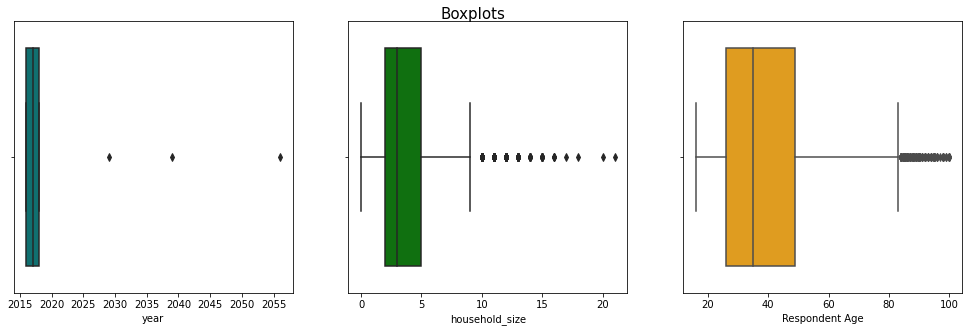

In [9]:
# Plotting boxplots to check for outliers

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(17,5 ))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
sns.boxplot(data['year'], ax=ax1, color = "teal")
sns.boxplot(data['household_size'], ax=ax2, color = "green")
sns.boxplot(data['Respondent Age'], ax=ax3, color = "orange")
plt.show()

There were outliers for all three numeric variables. For the outliers in years, we shall take them as data entry erros, for houehold size and age, we shall assign all extreme values their respective modes.


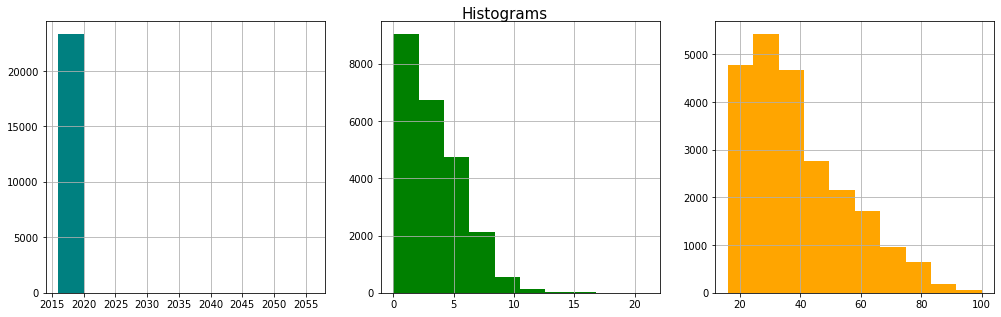

In [10]:
# Generating a histogram for each of the numeric variables

fig, (hist1,hist2, hist3) = plt.subplots(1, 3, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
data['year'].hist(ax=hist1, color = "teal")
data['household_size'].hist(ax=hist2, color = "green")
data['Respondent Age'].hist(ax=hist3, color = "orange")


plt.show()

The above histograms show how the numeric variables data is distributed starting with the years, then household size and lastly, Respondent Age.

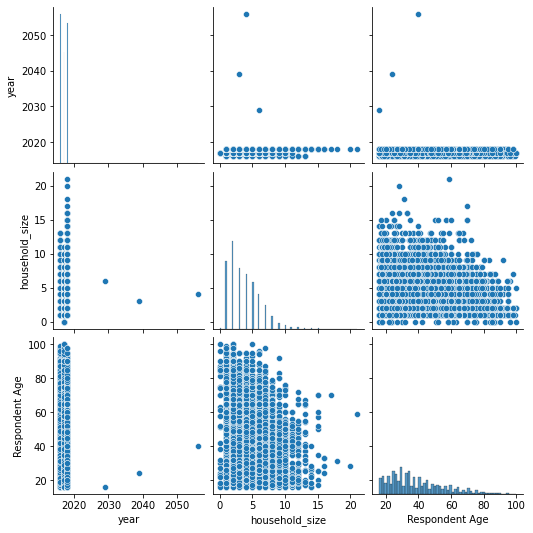

In [11]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(data)

The above shows a multiple pairwise bivariate distributions of the numeric variables in our dataset 

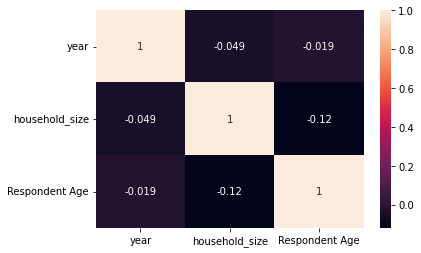

In [12]:
# Plotting a correlation heat map
sns.heatmap(data.corr(),annot=True)
plt.show()

The heatmap shows that all the numeric variables have a negative correlation with each other. 

This means that as the years progressed, Respondent's Age and household size decreased.

As the household size increased, the Respondent's Age reduced and the size was bigger in the earlier years.

In [13]:
# Before dealing with outliers, let's first check for duplicates.

duplicates = data[data.duplicated()]
duplicates.shape

# no rows had duplicates

# Checking how many respondents fall under each year
year_table = data['year'].value_counts()
print(year_table)

# Using the data provided from FSD Kenya for validation, we note that each country had data from a specific year, i.e Kenya & Uganda - 2018,
# Tanzania - 2017 and Rwanda - 2016
# We shall first group the year data by country and confirm the above using crosstab() thus creating a frequency table

pd.crosstab(data['country'], data['year'])

# We can now reassign the outliers to the respective years since it's been confirmed that all data entries for Kenya were for 
# the year 2018, except for 2 entries (2029 and 2056) while Rwanda's entries were all recorded in 2016 except 1 (2039)
# For Uganda and Tanzania, the dataset corresponds with the data from FSD Kenya as it's from 2018 and 2017 respectively.

# We shall therefore assign the year outliers in Kenya to 2018 and the outlier from Rwanda to 2016 using to_replace() which works on str, regex or numeric objects
data.replace(to_replace=[2029, 2056, 2039],
           value= [2018, 2018, 2016], 
           inplace=True)

# Checking the years in the cleaned dataset
pd.crosstab(data['country'],data['year'])


2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


year,2016,2017,2018
country,,,
Kenya,0,0,6064
Rwanda,8684,0,0
Tanzania,0,6500,0
Uganda,0,0,2095


In [14]:
# Dealing with outliers in Respondent Age and Household size variables
# For household size, the maximum entry recorded was 21 which is extreme
# We shall identify outliers using the formulae: Upper boundary = Q3 +1.5*IQR and Lower boundary = Q1 – 1.5*IQR

# Generating a frequency table for household size and the relationship the respondent has to the household head to visualize how the data is distributed

table = pd.crosstab(data['The relationship with head'], data['household_size'])

Q1_hseholdsize = data['household_size'].quantile(.25)
Q3_hseholdsize = data['household_size'].quantile(.75)
IQR_hseholdsize = Q3_hseholdsize - Q1_hseholdsize

size_upper_boundary = Q3_hseholdsize + 1.5*IQR_hseholdsize
size_lower_boundary = Q1_hseholdsize - 1.5*IQR_hseholdsize

print("Our household size upper boundary is", size_upper_boundary, "and the lower boundary is", size_lower_boundary)

# Replacing  the data points that lie outside of the lower and the upper bound with a NULL value.
for x in ['household_size']:
    data.loc[data[x] < size_lower_boundary,x] = np.nan
    data.loc[data[x] > size_upper_boundary,x] = np.nan

# We shall now assign the null values the median of the variable since it was skewed

size_median = data['household_size'].median()
size_median
data['household_size'].fillna(data['household_size'].median(),inplace = True)

data.isna().sum()

Our household size upper boundary is 9.5 and the lower boundary is -2.5


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


country                       0
year                          0
uniqueid                      0
Has a Bank account            0
Type of Location              0
Cell Phone Access             0
household_size                0
Respondent Age                0
gender_of_respondent          0
The relationship with head    0
marital_status                0
Level of Educuation           0
Type of Job                   0
dtype: int64

In [15]:
# Checking for outliers in respondent's age using the interquartile range (IQR)
# First we calculate the lower (Q1) and upper(Q3) bounds

Q1_age = data['Respondent Age'].quantile(.25)
Q3_age = data['Respondent Age'].quantile(.75)

# Now we calculate the IQR
IQR_age = Q3_age - Q1_age

age_upper_boundary = Q3_age + 1.5*IQR_age
age_lower_boundary = Q1_age - 1.5*IQR_age

print("Our Respondent Age upper boundary is", age_upper_boundary, "and the lower boundary is", age_lower_boundary)

# Replacing  the data points that lie outside of the lower and the upper bound with a NULL value.
for x in ['Respondent Age']:
    data.loc[data[x] < age_lower_boundary,x] = np.nan
    data.loc[data[x] > age_upper_boundary,x] = np.nan

# We shall now assign the null values the median of the variable since it was skewed

age_median = data['Respondent Age'].median()
age_median

data['Respondent Age'].fillna(data['Respondent Age'].median(),inplace = True)

data.isna().sum()

Our Respondent Age upper boundary is 83.5 and the lower boundary is -8.5


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


country                       0
year                          0
uniqueid                      0
Has a Bank account            0
Type of Location              0
Cell Phone Access             0
household_size                0
Respondent Age                0
gender_of_respondent          0
The relationship with head    0
marital_status                0
Level of Educuation           0
Type of Job                   0
dtype: int64

**Categorical Variables**

In [16]:
# Here we get to see the count, unique categories, top category and the frequency and the data type per each categorical variable
# We shall use unique() to see the categories under each variable and confirm accuracy using the variable description shared earlier

data['Has a Bank account'].describe()

data['Type of Location'].describe()

data['Cell Phone Access'].describe()

data['gender_of_respondent'].describe()

data['The relationship with head'].describe()

data['Level of Educuation'].describe()
# There was an odd entry of '6' which wasn't one of the categories.

data['Type of Job'].describe()

data['country'].describe()

count      23343
unique         4
top       Rwanda
freq        8684
Name: country, dtype: object

20,046 respondents said they don't have a bank account. 

14,264 of the respondents lived in the rural areas.

17,334 respondents had phone access

13,767 of the respondents were female.

12,730 of the respondents were the heads of their respective households.

12,689 of the respondents studied up to Primary Education

6,361 respondents said they were self-employed

8,684 of the respondents were from Rwanda who made up a higher percentage of the dataset.



In [17]:
# For the categorical variables, only the Level of Education variable had an outlier.
# Since there were six categories, we shall assign that entry to the sixth category

#seeing the unique categories under Level of Education
data['Level of Educuation'].unique()

# Replacing 6 with 'Other/Dont know/RTA'
data.replace(to_replace=['6'],
           value= ['Other/Dont know/RTA'], 
           inplace=True)

# Checking the unique categories after replacement
data['Level of Educuation'].unique()
    

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

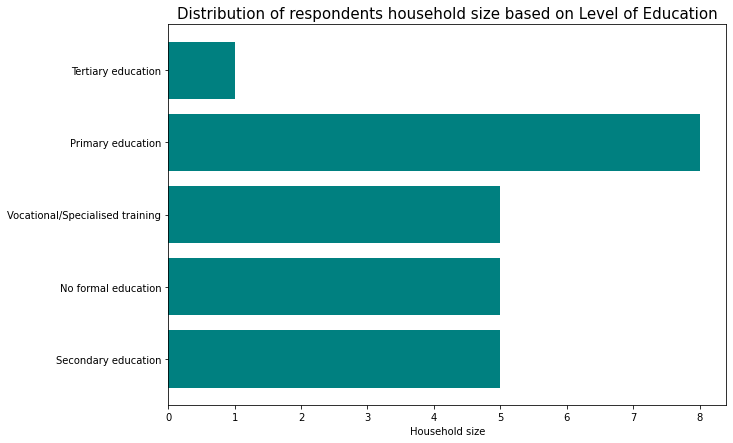

In [18]:
# Checking how different ages are distributed within the levels of education
Education = data['Level of Educuation'].head(12)
hse_size = data['household_size'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.xlabel('Household size', size = 10, color = 'black')
plt.title('Distribution of respondents household size based on Level of Education', size = 15, color = 'black')
# Horizontal Bar Plot
plt.barh(Education,hse_size, color = 'teal')
 
# Show Plot
plt.show()

Majority of the respondents had no formal education and featured the oldest people.

Vocational/Specialized training had the least number of respondents.

## **Bivariate Analysis**

Here, we'll carry out analysis describing the relationship between the two quantitative variables, and computing and interpreting the Pearson correlation coefficient.

The pearson correlation coefficient between the Respondent's age and household size is -0.10257289111748556
household_size
0.0      36
1.0    3928
2.0    5072
3.0    3890
4.0    3200
5.0    2716
6.0    2029
7.0    1378
8.0     740
9.0     354
Name: year, dtype: int64


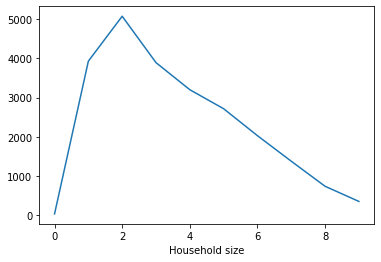

In [19]:
# Checking the correlation coefficient
# We had initially done this using the heat map
# Calculating the pearson coefficient

pearson_coeff = data["Respondent Age"].corr(data["household_size"], method="pearson") 
print("The pearson correlation coefficient between the Respondent's age and household size is", pearson_coeff)


# The two variables have a weak negative correlation meaning that the older the Respondent is, the smaller their household size

# Drawing a line plot

# First, we group data by household size
df = data.groupby('household_size').count()['year']
print(df)
 
# plot the result
df.plot()
plt.xticks(rotation=0)
plt.xlabel("Household size")
plt.show()

The line chart shows that fewer respondents had a household size of 8. Majority of them had a household size of less than or equal to 3.

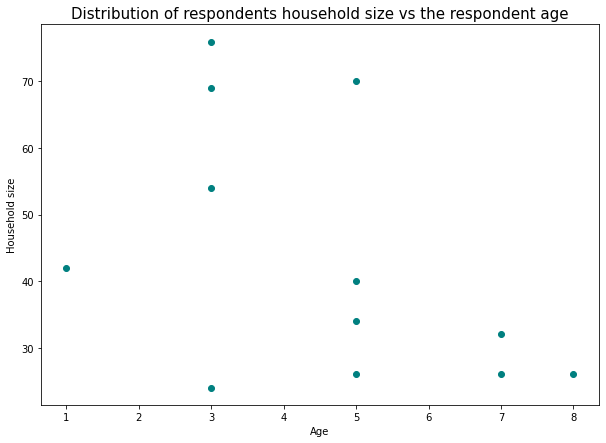

In [20]:
# Plotting a scatter plot to show relationship between Respondent Age and household size

Age = data['Respondent Age'].head(12)
hse_size = data['household_size'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.xlabel('Age', size = 10, color = 'black')
plt.ylabel('Household size', size = 10, color = 'black')
plt.title('Distribution of respondents household size vs the respondent age', size = 15, color = 'black')
# Horizontal Bar Plot
plt.scatter(hse_size, Age,color = 'teal')
 
# Show Plot
plt.show()

# The data points are spread out thus showing there's no relationship between the two variables

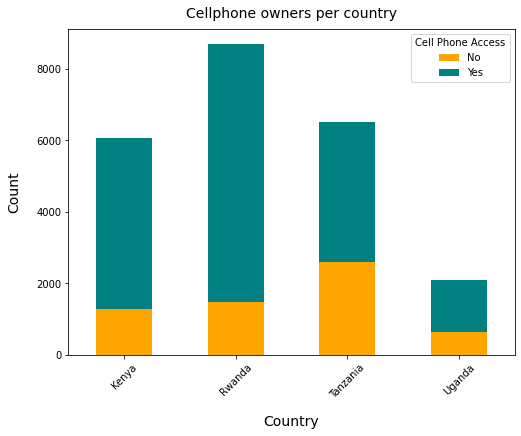

In [21]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by cell phone access and the countries of our respondents

phone_access = data.groupby(['Cell Phone Access', 'country']).count()
phone_access

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
phone_access_pivot = phone_access.pivot_table(index=['country'],columns = ['Cell Phone Access'],values = 'household_size')
phone_access_pivot

# Plotting our stacked column chart
phone_access_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Cellphone owners per country", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()


With respect to the country's specific sample sizes, we see from the chart that Rwanda had most cell phone owners.
Tanzania had most respondents who didn't have cell phones.


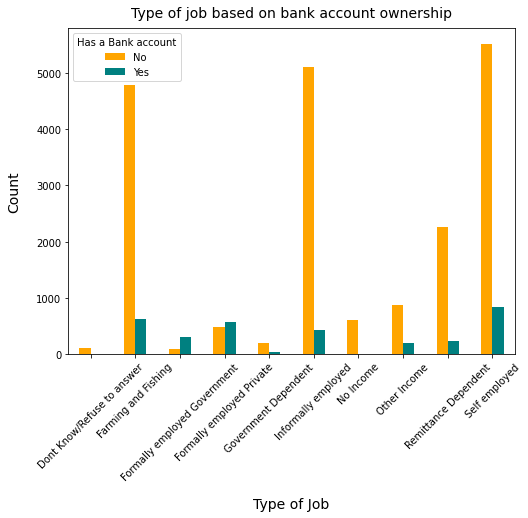

Has a Bank account,No,Yes
Type of Job,,
Dont Know/Refuse to answer,111,14
Farming and Fishing,4788,634
Formally employed Government,87,299
Formally employed Private,481,567
Government Dependent,197,50
Informally employed,5110,440
No Income,605,13
Other Income,881,196
Remittance Dependent,2269,240


In [26]:
# What type of job do the respondents do based on their bank ownership?
# Creating the column chart

# First, we'll create a table grouping our data by gender and the levels of education of our respondents

education = data.groupby(['Type of Job', 'Has a Bank account']).count().dropna()
education

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
education_pivot = education.pivot_table(index=['Type of Job'],columns = ['Has a Bank account'],values = 'household_size')
education_pivot

# Plotting our stacked column chart
education_pivot.plot(kind='bar',stacked = False, figsize=(8, 6), color =['orange','teal'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Type of job based on bank account ownership", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Type of Job", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

# Majority of the bank owners were self employed. Therefore, more banks should target business owners 
# and have services that cater to their needs.

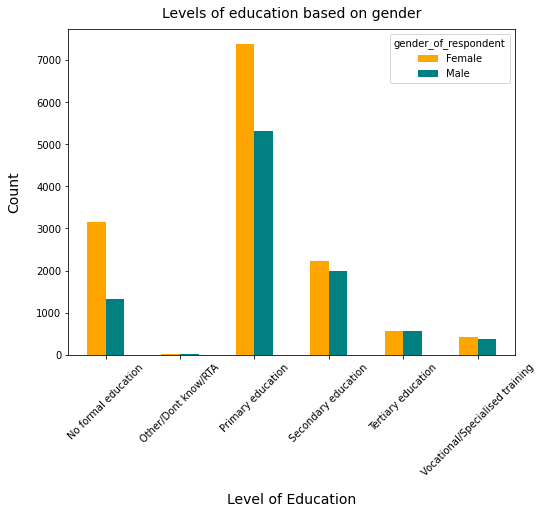

In [27]:
# What is the distribution of level of education depending on gender?
# Creating the column chart

# First, we'll create a table grouping our data by gender and the levels of education of our respondents

education = data.groupby(['Level of Educuation', 'gender_of_respondent']).count()
education

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
education_pivot = education.pivot_table(index=['Level of Educuation'],columns = ['gender_of_respondent'],values = 'household_size')
education_pivot

# Plotting our stacked column chart
education_pivot.plot(kind='bar',stacked = False, figsize=(8, 6), color =['orange','teal'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Levels of education based on gender", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Level of Education", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

# Most of the respondents studied up to the primary level
# More females than males are educated in each level

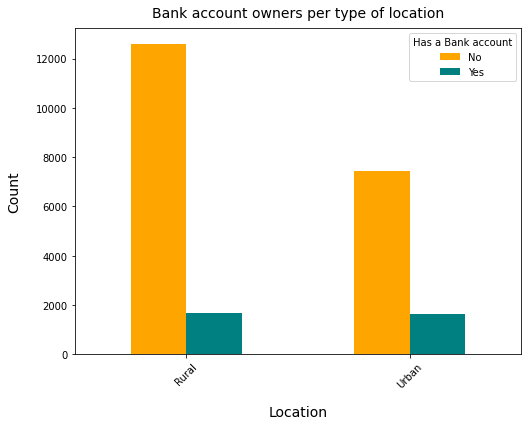

In [28]:
# Which area has more respondents with bank accounts, rural or urban?

# Creating the column chart

# First, we'll create a table grouping our data by bank account ownership and the type of locations of our respondents

bank_owners = data.groupby(['Has a Bank account', 'Type of Location']).count()
bank_owners

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
bank_owners_pivot = bank_owners.pivot_table(index=['Type of Location'],columns = ['Has a Bank account'],values = 'household_size')
bank_owners_pivot

# Plotting our stacked column chart
bank_owners_pivot.plot(kind='bar',stacked = False, figsize=(8, 6), color =['orange','teal'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Bank account owners per type of location", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Location", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

# Since most of the people without bank accounts are in rural areas, it should be further examined why this is the case
# Banks should look into ensuring they're easily accessible to people both in rural and urban areas.
# The number of people with bank accounts were almost equal in both rural and urban areas.
# There should be further investigation to see what causes this and if the issues are similar thus charting the way forward.

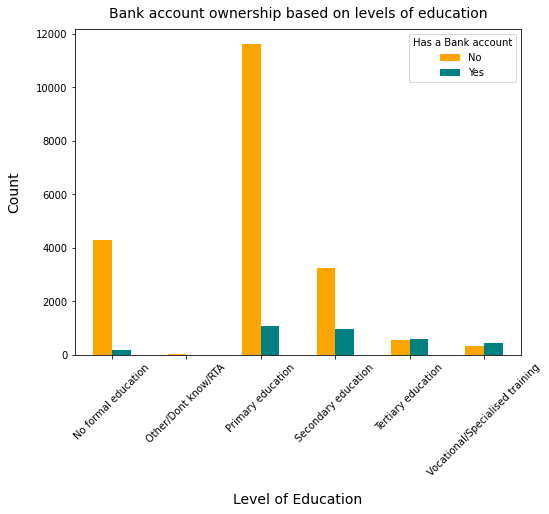

In [29]:
# What is the distribution of respondent's bank ownership based on level of education ?
# Creating the column chart

# First, we'll create a table grouping our data by gender and the levels of education of our respondents

education = data.groupby(['Level of Educuation', 'Has a Bank account']).count()
education

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
education_pivot = education.pivot_table(index=['Level of Educuation'],columns = ['Has a Bank account'],values = 'household_size')
education_pivot

# Plotting our stacked column chart
education_pivot.plot(kind='bar',stacked = False, figsize=(8, 6), color =['orange','teal'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Bank account ownership based on levels of education", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Level of Education", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

# Majority of those with tertiary education and vocational/specialized training had a bank account
# Respondents who answered 'Other/Don't know/RTA' were leading in the number of respondents who didn't own bank accounts
# Most of the respondents who were bank account owners were those who studied up to the primary level
# Primary level respondents were almost the majority when it came to not having a bank account.
# Interventions on bridging that gap should be looked into once the issues causing it are established.

### **Multivariate Analysis**

Here, we shall perform multivariate analysis by finding relationships between variables using multiple regression analysis and applying reduction techniques.



## **Normalization of Features**

PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

We will implement PCA with the help of Python's Scikit-Learn library. Here, we'll train our models, make predictions and evaluate accuracies. The only additional step will be to perform PCA to find out optimal number of features before we train our models. These steps have been implemented as follows:

In [30]:

# First we'll convert our dataset's variable type to 'float'
# Code the categorical variables to avoid ending up with null values in our dataset

df = data
df['country'].replace(to_replace=['Kenya', 'Uganda','Tanzania', 'Rwanda'],
           value= [1,2,3,4], 
           inplace=True)
df['country'] = pd.to_numeric(df['country'],errors = 'coerce')

df['uniqueid'] = pd.to_numeric(df['uniqueid'], errors='coerce')
df['Has a Bank account'].replace(to_replace=['Yes', 'No'],
           value= [0,1], 
           inplace=True)
df['Has a Bank account'] = pd.to_numeric(df['Has a Bank account'], errors = 'coerce')

df['Type of Location'].replace(to_replace=['Rural', 'Urban'],
           value= [0,1], 
           inplace=True)
df['Type of Location'] = pd.to_numeric(df['Type of Location'], errors = 'coerce')

df['Cell Phone Access'].replace(to_replace=['Yes', 'No'],
           value= [0,1], 
           inplace=True)
df['Cell Phone Access'] = pd.to_numeric(df['Cell Phone Access'], errors = 'coerce')

df['gender_of_respondent'].replace(to_replace=['Male', 'Female'],
           value= [0,1], 
           inplace=True)
df['gender_of_respondent'] = pd.to_numeric(df['gender_of_respondent'], errors = 'coerce')

df['The relationship with head'].replace(to_replace=['Head of Household', 'Spouse', 
                                                     'Child', 'Parent', 'Other relative', 'Other non-relatives', 'Dont know'],
                                         value= [1,2,3,4,5,6,7], 
                                         inplace=True)
df['The relationship with head'] = pd.to_numeric(df['The relationship with head'], errors = 'coerce')

df['marital_status'].replace(to_replace=['Married/Living together', 'Divorced/Seperated', 'Widowed', 'Single/Never Married', "Don't know"],
           value= [1,2,3,4,5], 
           inplace=True)
df['marital_status'] = pd.to_numeric(df['marital_status'], errors = 'coerce')

df['Level of Educuation'].replace(to_replace=['Secondary education', 'No formal education','Vocational/Specialised training', 'Primary education','Tertiary education', 'Other/Dont know/RTA'],
           value= [1,2,3,4,5,6], 
           inplace=True)
df['Level of Educuation'] = pd.to_numeric(df['Level of Educuation'], errors = 'coerce')

df['Type of Job'].replace(to_replace=['Farming and Fishing', 'Self employed','Formally employed Government', 'Formally employed Private',
                                      'Informally employed', 'Remittance Dependent', 'Government Dependent', 'Other Income','No Income','Dont Know/Refuse to answer'],
           value= [1,2,3,4,5,6,7,8,9,10], 
           inplace=True)

df['Type of Job'] = pd.to_numeric(df['Type of Job'], errors = 'coerce')
print(df.dtypes)

df



country                         int64
year                            int64
uniqueid                      float64
Has a Bank account              int64
Type of Location                int64
Cell Phone Access               int64
household_size                float64
Respondent Age                float64
gender_of_respondent            int64
The relationship with head      int64
marital_status                float64
Level of Educuation             int64
Type of Job                     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Educuation,Type of Job
0,1,2018,1.0,0,0,0,3.0,24.0,1,2,1.0,1,2
1,1,2018,2.0,1,0,1,5.0,70.0,1,1,3.0,2,7
2,1,2018,3.0,0,1,0,5.0,26.0,0,5,4.0,3,2
3,1,2018,4.0,1,0,0,5.0,34.0,1,1,1.0,4,4
4,1,2018,5.0,1,1,1,8.0,26.0,0,3,4.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2,2018,2113.0,1,0,0,4.0,48.0,1,1,2.0,2,8
23520,2,2018,2114.0,1,0,0,2.0,27.0,1,1,4.0,1,8
23521,2,2018,2115.0,1,0,0,5.0,27.0,1,4,3.0,4,8
23522,2,2018,2116.0,1,1,0,7.0,30.0,1,4,2.0,1,2


In [31]:
# We shall divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable. 

X = df.drop('country', 1) # assign the feature columns to variable 'X'
y = df['country']  # assign the class column to variable 'Y'
X


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Educuation,Type of Job
0,2018,1.0,0,0,0,3.0,24.0,1,2,1.0,1,2
1,2018,2.0,1,0,1,5.0,70.0,1,1,3.0,2,7
2,2018,3.0,0,1,0,5.0,26.0,0,5,4.0,3,2
3,2018,4.0,1,0,0,5.0,34.0,1,1,1.0,4,4
4,2018,5.0,1,1,1,8.0,26.0,0,3,4.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,2113.0,1,0,0,4.0,48.0,1,1,2.0,2,8
23520,2018,2114.0,1,0,0,2.0,27.0,1,1,4.0,1,8
23521,2018,2115.0,1,0,0,5.0,27.0,1,4,3.0,4,8
23522,2018,2116.0,1,1,0,7.0,30.0,1,4,2.0,1,2


In [32]:
# apply the standard scaler to our dataset's features
# Here, we shall split the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Next, we want to ensure that the machine learning algorithm treats each column with equal importance
# We shall scale the features through standardisation using Python's ‘StandardScaler’ function 
# built into scikit-learn, so equal importance is placed on each column

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [34]:
# Next, we import, initialise, and fit the PCA algorithm, built into scikit-learn, to the ‘X’ variable

from sklearn.decomposition import PCA


# Dealing with the NaN or infinite values
X_train[np.isfinite(X_train) == False] = 0
X_train[np.isnan(X_train) == True] = 0

X_test[np.isfinite(X_test) == False] = 0
X_test[np.isnan(X_test) == True] = 0

np.any(np.isnan(X_train))
np.all(np.isfinite(X_train))

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
# We execute the following line of code to find the "explained variance ratio".

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15394701, 0.1362505 , 0.11495927, 0.10260245, 0.08448436,
       0.07620599, 0.07245358, 0.06410534, 0.0583878 , 0.05076175,
       0.04763397, 0.03820799])

We see that the first component explaines 15% of the variance and second component explains 13% of the variance.

In [36]:
# Next we'll try to use 1 principal component to train our algorithm.
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)